<a href="https://colab.research.google.com/github/mugureeDOTcom/DataScience-Internsavy/blob/main/GRADUATION_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**.

Based on Indian standards these are the parameters needed:

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

**CITING**

Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

Data used from Kaggle

In [2]:
###IMPORTING NECESSARY LIBRARIRES 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from lightgbm import LGBMRegressor

### **PREPROCESSING**

In [6]:
##LOADING THE DATA SET
url ="/content/Admission_Predict_Ver1.1.csv"
admit = pd.read_csv(url)

In [7]:
##CHECKING THE DATASET TOP
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
##CHECKING THE DATASET TAIL
admit.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [9]:
##SHAPE OF THE DATASET
admit.shape


(500, 9)

In [10]:
###CHECKING DATATYPES
admit.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
###CHECKING GENERAL DATA INFO
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [12]:
###CHECKING FOR NULL VALUES
admit.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [13]:
###CHECKING ALL COLUMNS
admit.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

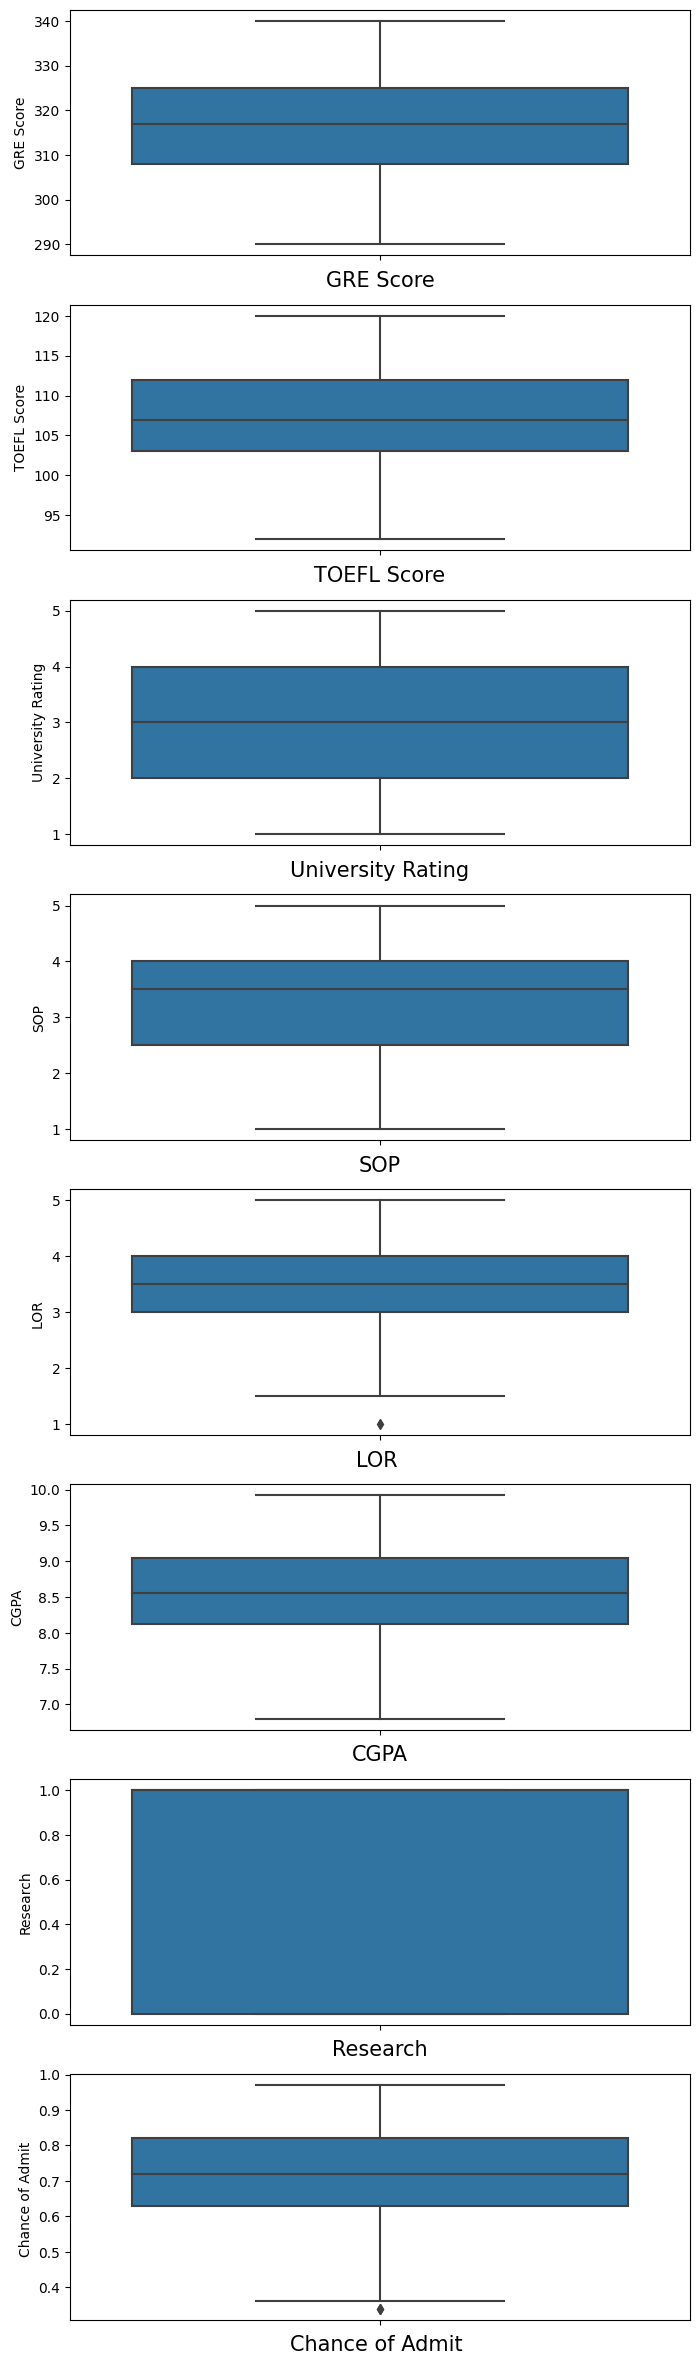

In [14]:
###OUTLIERS IN VARIOUS COLUMNS

admit1 = admit.drop(['Serial No.'], axis=1)
col_names = ['GRE Score','TOEFL Score','University Rating',	'SOP'	,'LOR ','CGPA','Research',	'Chance of Admit ']
fig, ax = plt.subplots(len(col_names), figsize=(8,30))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=admit1[col_val], ax=ax[i])
  ax[i].set_xlabel(col_val, fontsize= 15)

In [15]:
###THERE ARE OUTLIERS IN CHANCE OF ADMIT AND LOR
##I am keeping the outliers since they are valid and not of the higher range, just represent underperformance.


###**UNIVARIATE ANALYSIS**

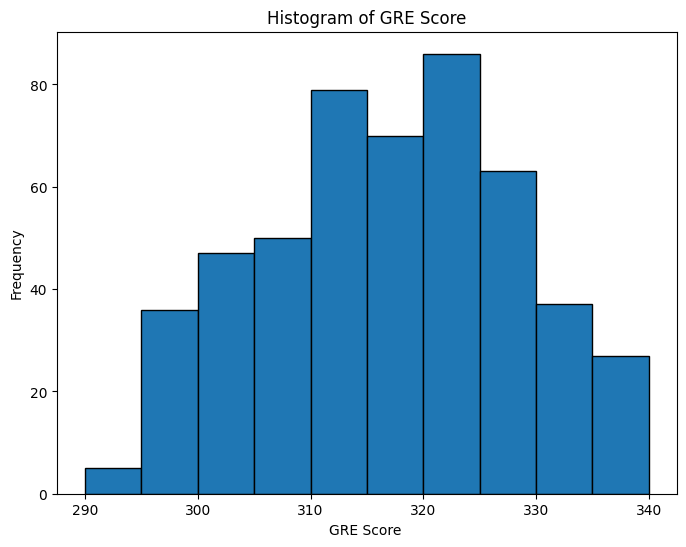

In [27]:
###Univairate analysis
###HISTOGRAMS FOR UNIVARIATE ANALYSIS

plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['GRE Score'], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('GRE Score ')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of GRE Score')  # Set the title
plt.show()  # Display the plot

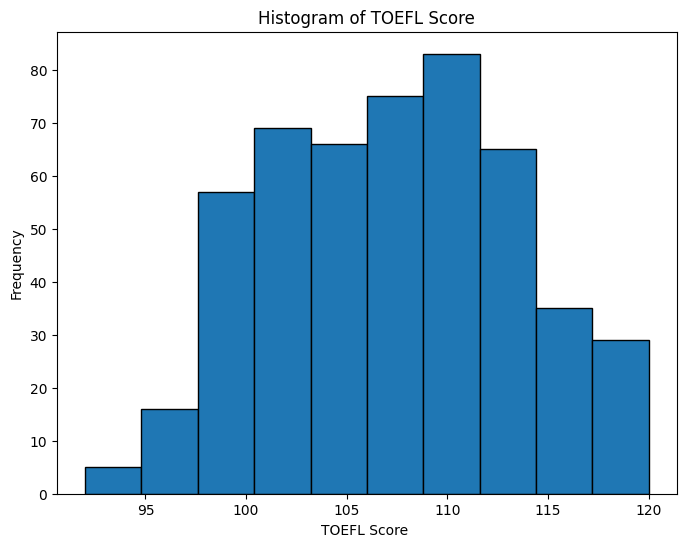

In [28]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['TOEFL Score'], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('TOEFL Score ')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of TOEFL Score')  # Set the title
plt.show()  # Display the plot

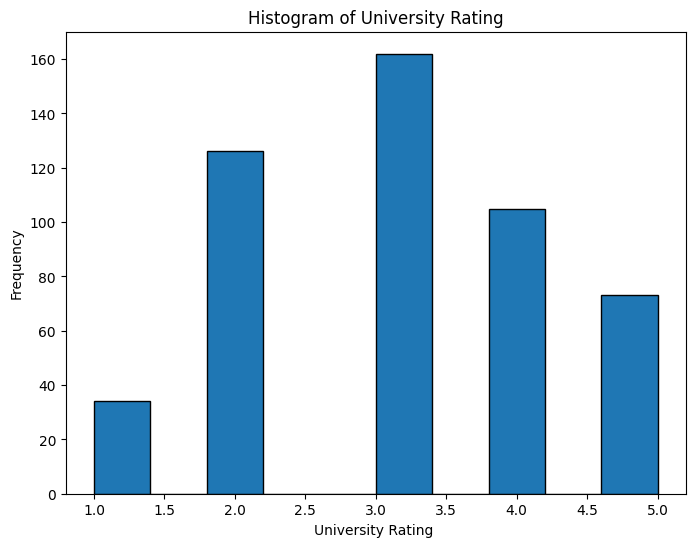

In [29]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['University Rating'], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('University Rating ')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of University Rating')  # Set the title
plt.show()  # Display the plot

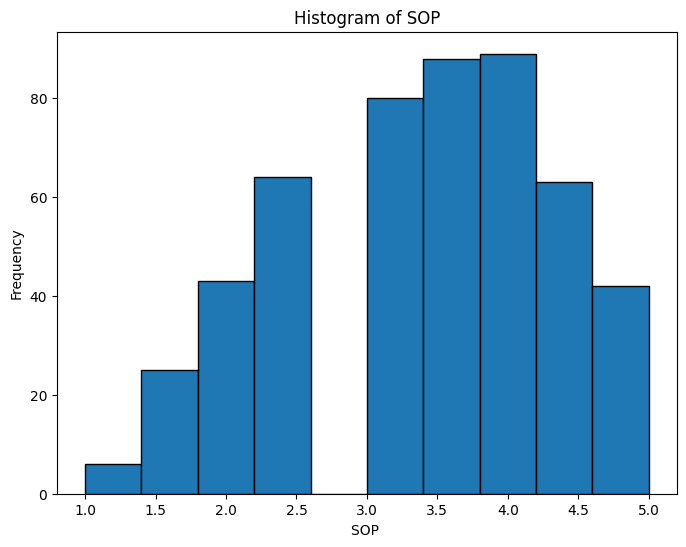

In [30]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['SOP'], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('SOP ')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of SOP')  # Set the title
plt.show()  # Display the plot

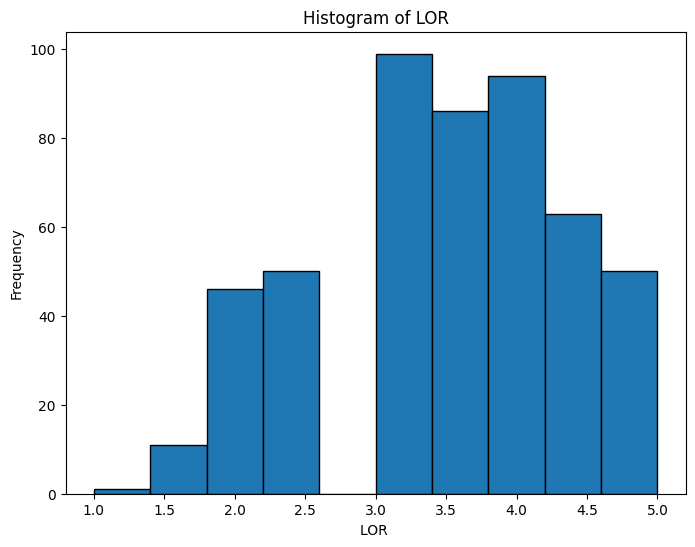

In [31]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['LOR '], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('LOR ')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of LOR')  # Set the title
plt.show()  # Display the plot

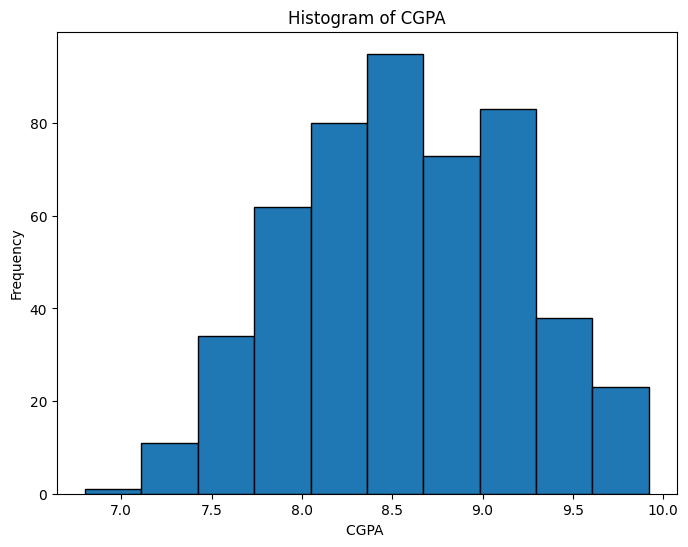

In [33]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['CGPA'], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('CGPA ')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of CGPA')  # Set the title
plt.show()  # Display the plot

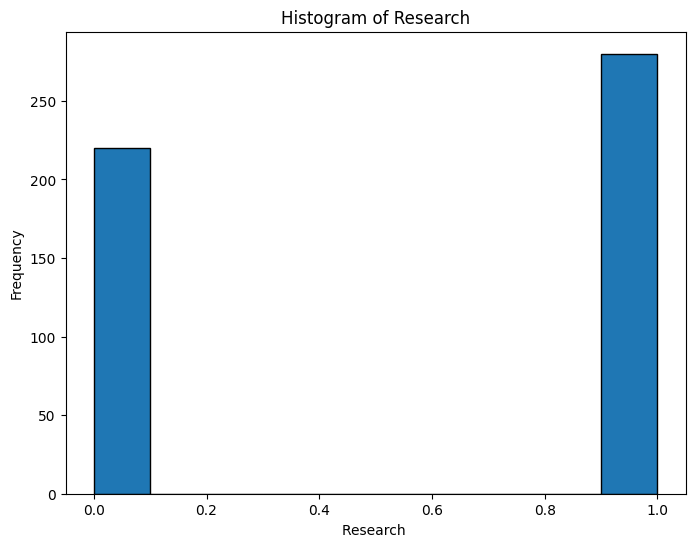

In [34]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['Research'], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('Research ')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of Research')  # Set the title
plt.show()  # Display the plot

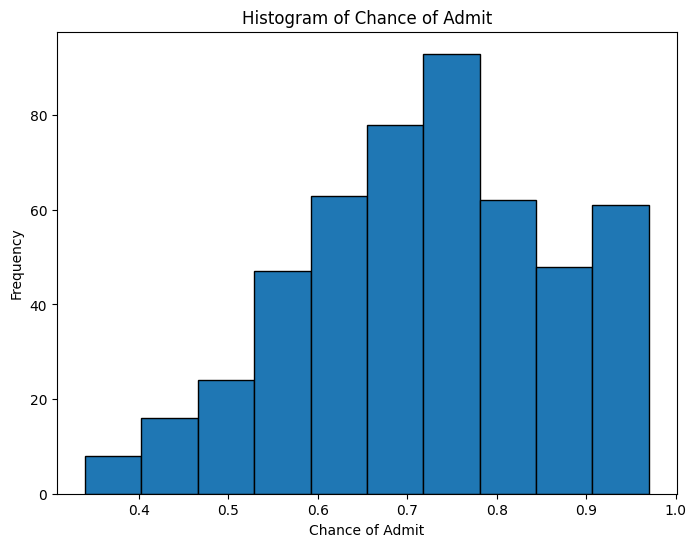

In [39]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(admit['Chance of Admit '], bins=10, edgecolor='black')  # Create the histogram
plt.xlabel('Chance of Admit')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of Chance of Admit')  # Set the title
plt.show()  # Display the plot

**OBSERVATIONS**

In [43]:
import numpy as np

# Select columns for statistical analysis
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

# Calculate statistical measures for selected columns
statistics = admit[columns].describe().loc[['50%', 'mean', 'std', 'min', 'max']]

print(statistics)


       GRE Score  TOEFL Score  University Rating       SOP     LOR       CGPA  \
50%   317.000000   107.000000           3.000000  3.500000  3.50000  8.560000   
mean  316.472000   107.192000           3.114000  3.374000  3.48400  8.576440   
std    11.295148     6.081868           1.143512  0.991004  0.92545  0.604813   
min   290.000000    92.000000           1.000000  1.000000  1.00000  6.800000   
max   340.000000   120.000000           5.000000  5.000000  5.00000  9.920000   

      Research  Chance of Admit   
50%   1.000000           0.72000  
mean  0.560000           0.72174  
std   0.496884           0.14114  
min   0.000000           0.34000  
max   1.000000           0.97000  


###**BIVARIATE ANALYSIS**

######**SCATTER PLOTS**

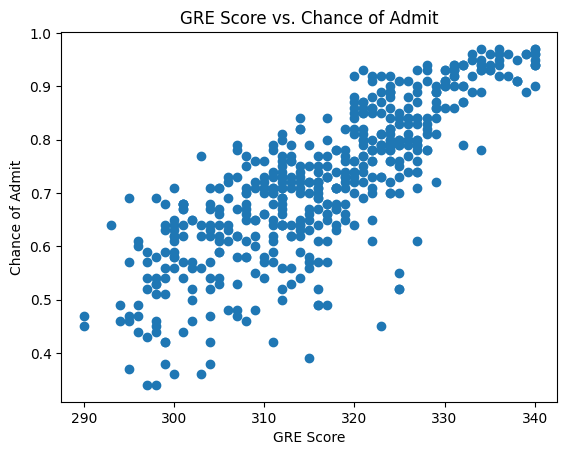

In [44]:

import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['GRE Score'], admit['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs. Chance of Admit')
plt.show()


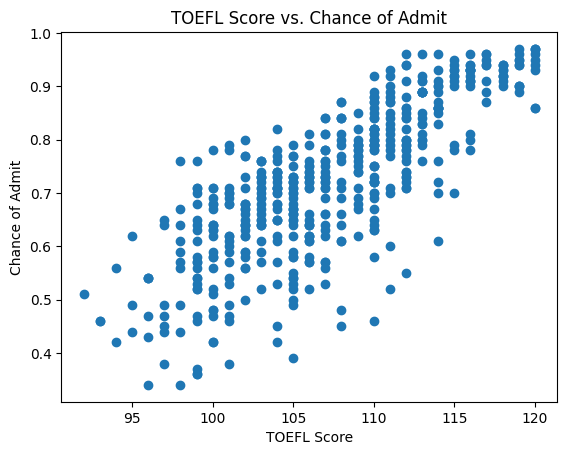

In [47]:
import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['TOEFL Score'], admit['Chance of Admit '])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs. Chance of Admit')
plt.show()


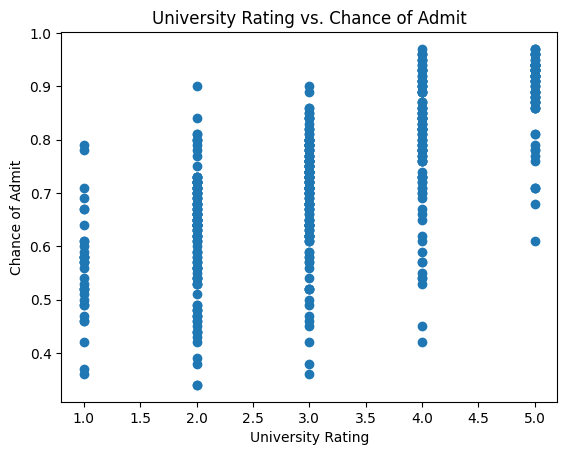

In [49]:
import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['University Rating'], admit['Chance of Admit '])
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.title('University Rating vs. Chance of Admit')
plt.show()


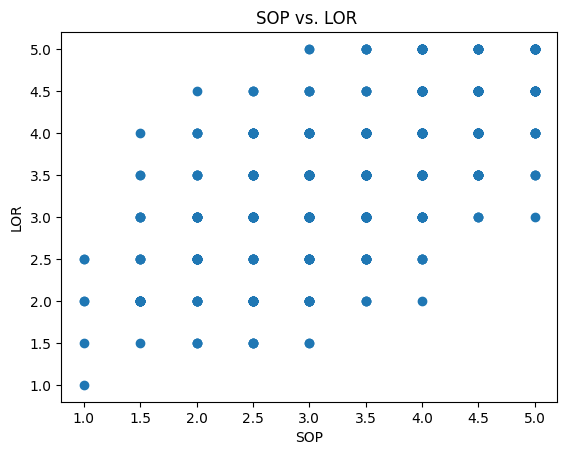

In [50]:
import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['SOP'], admit['LOR '])
plt.xlabel('SOP')
plt.ylabel('LOR')
plt.title('SOP vs. LOR ')
plt.show()

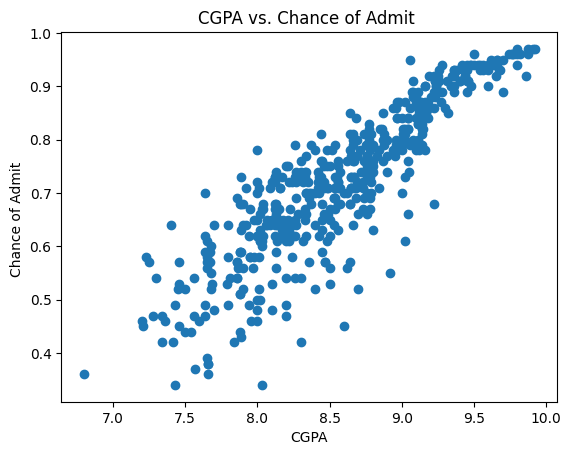

In [51]:
import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['CGPA'], admit['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.title('CGPA vs. Chance of Admit ')
plt.show()

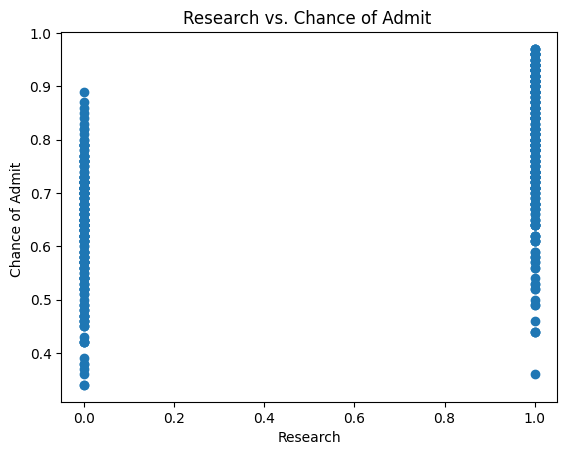

In [52]:
import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['Research'], admit['Chance of Admit '])
plt.xlabel('Research')
plt.ylabel('Chance of Admit ')
plt.title('Research vs. Chance of Admit ')
plt.show()

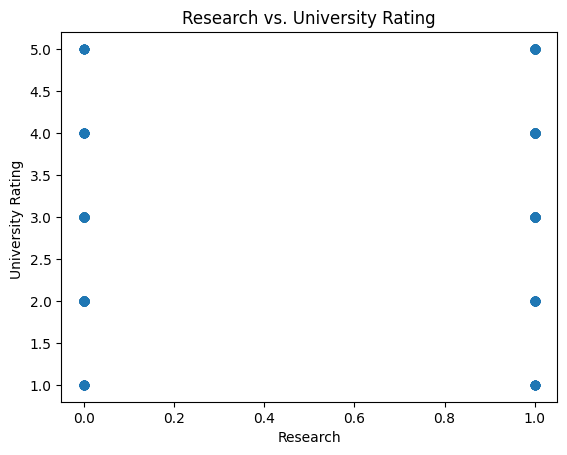

In [53]:
import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['Research'], admit['University Rating'])
plt.xlabel('Research')
plt.ylabel('University Rating ')
plt.title('Research vs. University Rating')
plt.show()

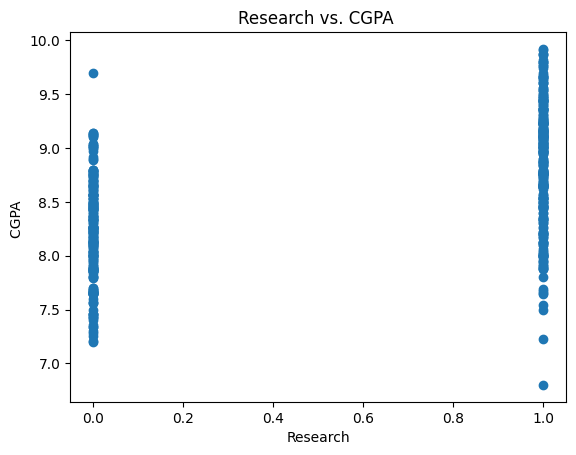

In [55]:
import matplotlib.pyplot as plt

# Scatter plot of GRE Score vs. Chance of Admit
plt.scatter(admit['Research'], admit['CGPA'])
plt.xlabel('Research')
plt.ylabel('CGPA ')
plt.title('Research vs. CGPA ')
plt.show()

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

# Cross-tabulation of Research and University Rating
cross_tab = pd.crosstab(admit['Research'], admit['University Rating'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(cross_tab)

# Print the cross-tabulation
print("Cross-tabulation of Research and University Rating:")
print(cross_tab)
print()

# Print the chi-square test results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Cross-tabulation of Research and University Rating:
University Rating   1   2   3   4   5
Research                             
0                  24  89  75  23   9
1                  10  37  87  82  64

Chi-square test results:
Chi-square statistic: 96.90000948490646
P-value: 4.4936229585994394e-20
Degrees of freedom: 4
Expected frequencies:
[[14.96 55.44 71.28 46.2  32.12]
 [19.04 70.56 90.72 58.8  40.88]]


# **MODEL - LINEAR REGRESSION ALGORITHM**

In [71]:
# Assuming your dataset is stored in a DataFrame called 'admit'
# Select the relevant columns for independent variables (features) and the target variable
X = admit[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = admit['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.003704655398788405


In [80]:
import pandas as pd

# Create a dictionary with the input values
input_dict = {
    'GRE Score': [337],
    'TOEFL Score': [118],
    'University Rating': [4],
    'SOP': [4.5],
    'LOR ': [4.5],
    'CGPA': [9.65],
    'Research': [1]
}

# Create the input_data DataFrame
input_data = pd.DataFrame(input_dict)

# Print the input_data DataFrame
print("Input Data:")
print(input_data)


Input Data:
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1


In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming your trained model is stored in a variable called 'regressor'
# Assuming your input data is stored in a DataFrame called 'input_data'

# Preprocess the input data (apply the same preprocessing steps as the training data)
# ...

# Transform the input data (apply the same transformations as the training data)
# ...

# Load the trained model
regressor = LinearRegression()

# Assuming your training data is stored in a DataFrame called 'train_data'
# Assuming your target variable is stored in a Series called 'target'

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the input data
chances_of_admit = regressor.predict(input_data)

# Print the predicted chances of admission
print("Predicted Chance of Admit:")
print(chances_of_admit)


Predicted Chance of Admit:
[0.9583926]
